In [1]:
import os
import copy
import dota2api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
API_KEY = '2029A39ECAAB627B5F71CF4C3E30F72D'
api = dota2api.Initialise(API_KEY)

In [3]:
data = pd.read_csv('../data/draft/capmodedata.csv')

In [4]:
data.head(5)

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,17hero_id,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id
0,1928898739,True,2885,False,0,73,False,1,69,False,...,41.0,False,0.0,81.0,True,1.0,105.0,True,0.0,94.0
1,1928932285,True,1894,False,0,69,False,1,102,False,...,40.0,False,0.0,28.0,True,1.0,97.0,True,0.0,62.0
2,1928903165,True,2424,False,1,85,False,0,68,False,...,30.0,False,1.0,47.0,True,0.0,58.0,True,1.0,33.0
3,1928907204,True,2588,False,1,71,False,0,73,False,...,30.0,False,1.0,68.0,True,0.0,50.0,True,1.0,21.0
4,1928865084,True,3658,False,1,12,False,0,42,False,...,93.0,False,1.0,67.0,True,0.0,72.0,True,1.0,40.0


In [5]:
data.columns

Index(['match_id', 'radiant_win', 'duration', '1is_pick', '1team_id',
       '1hero_id', '2is_pick', '2team_id', '2hero_id', '3is_pick', '3team_id',
       '3hero_id', '4is_pick', '4team_id', '4hero_id', '5is_pick', '5team_id',
       '5hero_id', '6is_pick', '6team_id', '6hero_id', '7is_pick', '7team_id',
       '7hero_id', '8is_pick', '8team_id', '8hero_id', '9is_pick', '9team_id',
       '9hero_id', '10is_pick', '10team_id', '10hero_id', '11is_pick',
       '11team_id', '11hero_id', '12is_pick', '12team_id', '12hero_id',
       '13is_pick', '13team_id', '13hero_id', '14is_pick', '14team_id',
       '14hero_id', '15is_pick', '15team_id', '15hero_id', '16is_pick',
       '16team_id', '16hero_id', '17is_pick', '17team_id', '17hero_id',
       '18is_pick', '18team_id', '18hero_id', '19is_pick', '19team_id',
       '19hero_id', '20is_pick', '20team_id', '20hero_id'],
      dtype='object')

In [6]:
# # # Getting Heroes ID according to the name
heroes = api.get_heroes()

In [7]:
heroes_dict = {}
for i in range (len(heroes['heroes'])):
    hero_id = heroes['heroes'][i]['id']
    hero_name = heroes['heroes'][i]['localized_name']
    heroes_dict[hero_id]= hero_name

In [8]:
def change_hero_name(row):
    if row in heroes_dict:
        return heroes_dict[row]
    
columns = [
    '1hero_id', 
    '2hero_id', 
    '3hero_id', 
    '4hero_id', 
    '5hero_id', 
    '6hero_id', 
    '7hero_id', 
    '8hero_id', 
    '9hero_id',
    '10hero_id',
    '11hero_id', 
    '12hero_id', 
    '13hero_id', 
    '14hero_id', 
    '15hero_id', 
    '16hero_id', 
    '17hero_id', 
    '18hero_id', 
    '19hero_id',
    '20hero_id'
    ]
    
for i in range(len(columns)):
    data[columns[i]] = data[columns[i]].apply(change_hero_name)

In [9]:
data.head(5)

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,17hero_id,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id
0,1928898739,True,2885,False,0,Alchemist,False,1,Doom,False,...,Faceless Void,False,0.0,Chaos Knight,True,1.0,Techies,True,0.0,Medusa
1,1928932285,True,1894,False,0,Doom,False,1,Abaddon,False,...,Venomancer,False,0.0,Slardar,True,1.0,Magnus,True,0.0,Bounty Hunter
2,1928903165,True,2424,False,1,Undying,False,0,Ancient Apparition,False,...,Witch Doctor,False,1.0,Viper,True,0.0,Enchantress,True,1.0,Enigma
3,1928907204,True,2588,False,1,Spirit Breaker,False,0,Alchemist,False,...,Witch Doctor,False,1.0,Ancient Apparition,True,0.0,Dazzle,True,1.0,Windranger
4,1928865084,True,3658,False,1,Phantom Lancer,False,0,Wraith King,False,...,Slark,False,1.0,Spectre,True,0.0,Gyrocopter,True,1.0,Venomancer


In [10]:
np.max(data['duration'])
max_hours = (np.max(data['duration'])) / 60
max_hours

161.26666666666668

In [11]:
def convert_to_minutes(row):
    return row / 60

data['minutes'] = data['duration'].apply(convert_to_minutes)

In [12]:
groupby_minute = data.groupby(['minutes']).count()

In [13]:
# groupby_minute.head()

In [14]:
len(groupby_minute)

5184

In [15]:
groupby_minute.index

Float64Index([0.03333333333333333, 0.26666666666666666, 0.36666666666666664,
               0.5166666666666667,                0.55,  0.5833333333333334,
               0.6333333333333333,                0.65,                 0.8,
               0.8166666666666667,
              ...
               127.83333333333333,              129.05,              136.35,
                           138.05,              138.35,  140.86666666666667,
               142.46666666666667,               143.2,               153.3,
               161.26666666666668],
             dtype='float64', name='minutes', length=5184)

In [16]:
max(groupby_minute.index)

161.26666666666668

(array([819., 967., 968., 967., 949., 444.,  50.,  11.,   7.,   2.]),
 array([3.33333333e-02, 1.61566667e+01, 3.22800000e+01, 4.84033333e+01,
        6.45266667e+01, 8.06500000e+01, 9.67733333e+01, 1.12896667e+02,
        1.29020000e+02, 1.45143333e+02, 1.61266667e+02]),
 <a list of 10 Patch objects>)

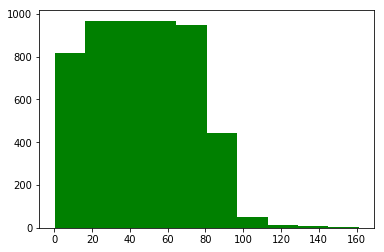

In [17]:
plt.hist(groupby_minute.index, histtype='bar', color='green')

In [32]:
# # As there should be no bias, lets see which side of the map has the most win or is it equal

In [19]:
base1 = data.loc[data['radiant_win'] == True]

In [20]:
len(base1)

233537

In [21]:
base2 = data.loc[data['radiant_win'] == False]

In [22]:
len(base2)

227513

In [23]:
total = len(base1) + len(base2)

In [24]:
total

461050

In [25]:
len(data)

461050

In [26]:
temp_a = ['radiant', 'dire']
temp_b = [len(base1), len(base2)]

<BarContainer object of 2 artists>

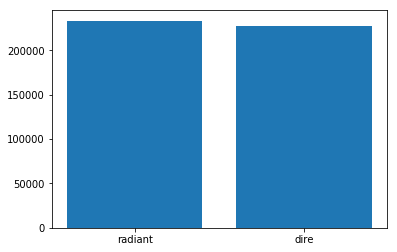

In [31]:
plt.bar(temp_a, temp_b)

In [33]:
# # Let's Analyze the Draft
# # As each draft must have it's own machine learning and send the data to the next machine learning model

In [28]:
a = [20, 2, 3, 4, 1, 1, 1, 4, 1, 1]

(array([6., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

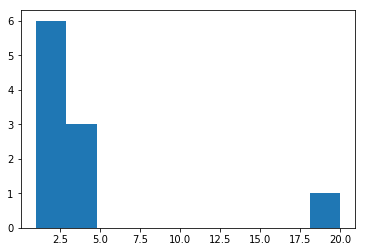

In [29]:
plt.hist(a)